In [3]:
import pandas as pd
from scipy.interpolate import splrep, BSpline
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d

from matplotlib import pyplot as plt
import numpy as np
import os

FileNotFoundError: [Errno 2] No such file or directory: 'data/1DHeisenberg_5Q_FQS_GCdist_NoFreezeCounts_d0.01_GateIters_30cycles_3layers_50trials_Ansatz_A.xlsx'

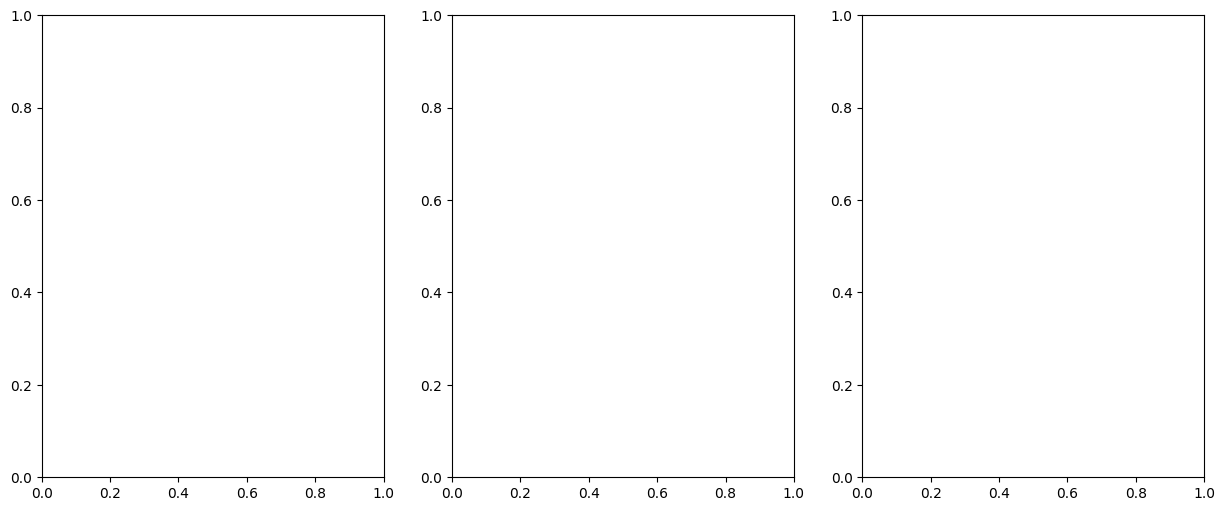

In [ ]:
trials = 50
layers = 3
qubits = 5
iters = 30

# choose "param" or "matrix" for distance metric. 
# Matrix distance has only results for Ansatz A
dist_metric = "param" # "matrix"

# Choose ansatz: A, B, C or D
ansatz = "A"

dvals = [0.01,0.005,0.001]

fig, axes = plt.subplots(1, len(dvals))

fig.set_figheight(6)
fig.set_figwidth(15)

for d, ax in zip(dvals, axes.flatten()):
    if dist_metric == "param":
        df = pd.read_excel(f"data/1DHeisenberg_{qubits}Q_FQS_NoFreezeCounts_GCdist_d{d}_GateIters_{iters}cycles_{layers}layers_{trials}trials_Ansatz_{ansatz}.xlsx")
    elif dist_metric == "matrix":
        df = pd.read_excel(f"data/1DHeisenberg_{qubits}Q_FQS_NoFreezeCounts_MatrixDist_d{d}_GateIters_{iters}cycles_{layers}layers_{trials}trials_Ansatz_{ansatz}.xlsx")
    df["mean"] = df.mean(axis=1) 
    means = np.array(df["mean"]) 

    c = means.reshape(layers, qubits).T
    #print(c)
    im = ax.imshow(c, cmap='jet', interpolation='nearest')
    clb = plt.colorbar(im, ax=ax, shrink=0.99)
    clb.ax.tick_params(labelsize=30) 
    ax.set_title(f"T = {p}", fontsize=34, y=1.03)
    
    ax.set_xticks(range(layers))
    ax.set_yticks(range(qubits))

    ax.set_xlabel("Layer index", fontsize=30)
    ax.tick_params(labelsize=30)

axes[0].set_ylabel("Qubit index", fontsize=34)

#fig.suptitle(f"FQS without gate freeze, {qubits} qubits and {layers} layers", fontsize=25, y=1.05)
fig.tight_layout()

fig.savefig(f"{dist_metric}Dist_NoFreezeCountsHeatMap_FQS_1DHeisenberg_{qubits}Q_layers{layers}_{iters}iters_{trials}trials_Ansatz_{ansatz}.pdf", bbox_inches='tight')
